In [1]:
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import colors
import math

In [2]:
class Point:
    def __init__(self, x, y, cluster=None):
        self.x = x
        self.y = y
        self.cluster = cluster

In [3]:
# Выводит средние координаты из массива точек
def mean_coordinates(points):
    sum_x = sum(point.x for point in points)
    sum_y = sum(point.y for point in points)
    return sum_x / len(points), sum_y / len(points)


def dist(a, b):
    return np.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)

In [4]:
# Создаёт набор случайных точек
def random_points(n):
    result = []
    for i in range(n):
        result.append(Point(random.randint(0, 100), random.randint(0, 100)))
    return result


# Создаёт начальные центроиды
def first_centroids(points, n):
    center = Point(0, 0)
    for item in points:
        center.x += item.x
        center.y += item.y
    center.x /= len(points)
    center.y /= len(points)
    r = 0
    for item in points:
        d = dist(item, center)
        if d > r:
            r = d
    centroids = []
    for i in range(n):
        centroid = Point(r * np.cos(2 * np.pi * i / n) + center.x,
                         r * np.sin(2 * np.pi * i / n) + center.y)
        centroid.cluster = i
        centroids.append(centroid)
    return centroids


# Перерассчет позиции центроида
def recalculate_centroid(centroid, points):
    cluster_points = []
    for p in points:
        if p.cluster == centroid.cluster:
            cluster_points.append(p)
    centroid.x, centroid.y = mean_coordinates(cluster_points)
    return centroid


# Кластеризация k-means
def k_means(points, centroids, need_draw=False):
    should_continue = True
    if need_draw:
        draw(points, centroids, iteration=0)
    iteration = 1
    while should_continue:
        should_continue = False
        for p in points:
            prev_centroid = None
            new_centroid = None
            if p.cluster is not None:
                prev_centroid = centroids[p.cluster]
                new_centroid = centroids[p.cluster]
            min_dist = sys.maxsize
            for c in centroids:
                d = dist(p, c)
                if d <= min_dist:
                    min_dist = d
                    new_centroid = c
            if new_centroid is not None:
                p.cluster = new_centroid.cluster
                if prev_centroid != new_centroid:
                    if prev_centroid is not None:
                        centroids[prev_centroid.cluster] = recalculate_centroid(prev_centroid, points)
                    centroids[new_centroid.cluster] = recalculate_centroid(new_centroid, points)
                    should_continue = True
        if need_draw:
            draw(points, centroids, iteration=iteration)
        iteration += 1
    return points, centroids

In [5]:
# Вывод графика
def draw(points, centroids, iteration=0):
    plt.clf()
    plt.figure(figsize=(8, 8))
    plt.title(f'Шаг {iteration}', fontsize=24)
    for c in centroids:
        plt.scatter(c.x, c.y, color=colors.centroid_color)
    for p in points:
        if p.cluster is not None:
            plt.scatter(p.x, p.y, color=plt_colors[p.cluster])
        else:
            plt.scatter(p.x, p.y, color=colors.raw_point_color)
    plt.show()


# Метод для вывода оптимального количества кластеров
def optimal_clusters(points):
    criteria = []
    iterations = math.sqrt(len(points))
    for i in range(int(iterations)):
        centroids = first_centroids(points, i + 1)
        points, centroids = k_means(points, centroids, need_draw=False)
        criteria.append(sum(dist(point, centroids[point.cluster]) ** 2 for point in points))
        for p in points:
            p.cluster = None
    diff = []
    for i in range(len(criteria) - 1):
        if criteria[i + 1] != 0:
            diff.append(criteria[i] / criteria[i + 1])
        else:
            diff.append(float('inf'))
    # plt.plot(diff)
    # plt.show()
    return diff.index(min(diff)) + 1

Optimal clusters 9


<Figure size 640x480 with 0 Axes>

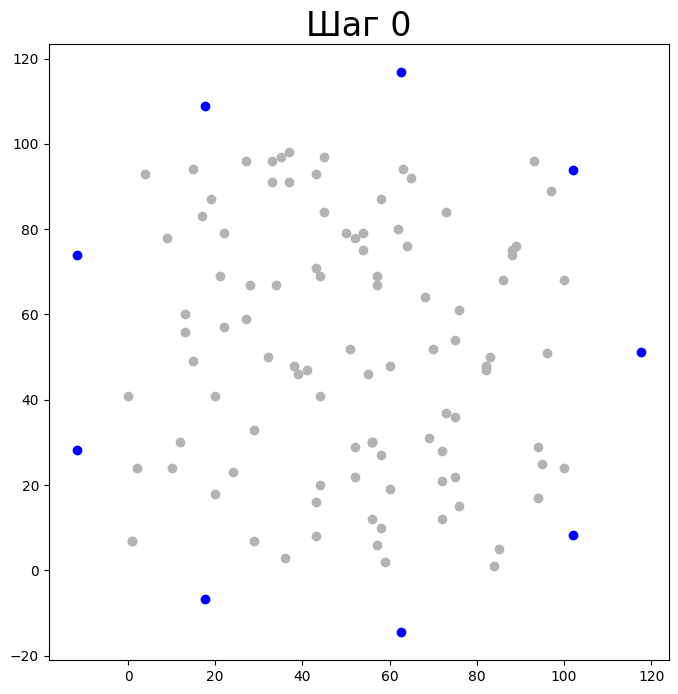

<Figure size 640x480 with 0 Axes>

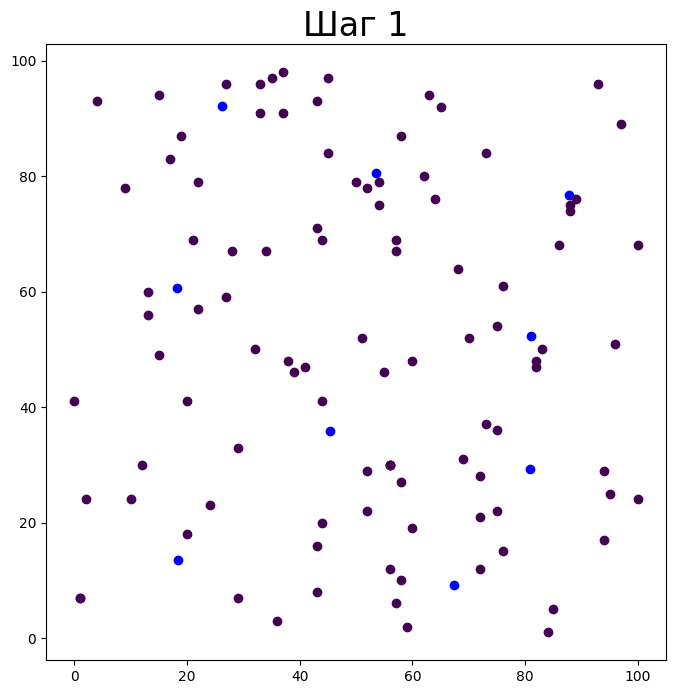

<Figure size 640x480 with 0 Axes>

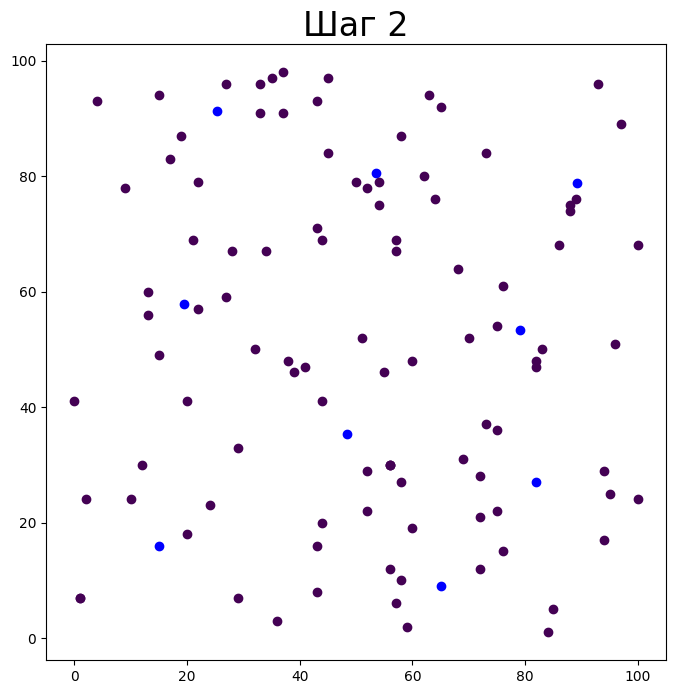

<Figure size 640x480 with 0 Axes>

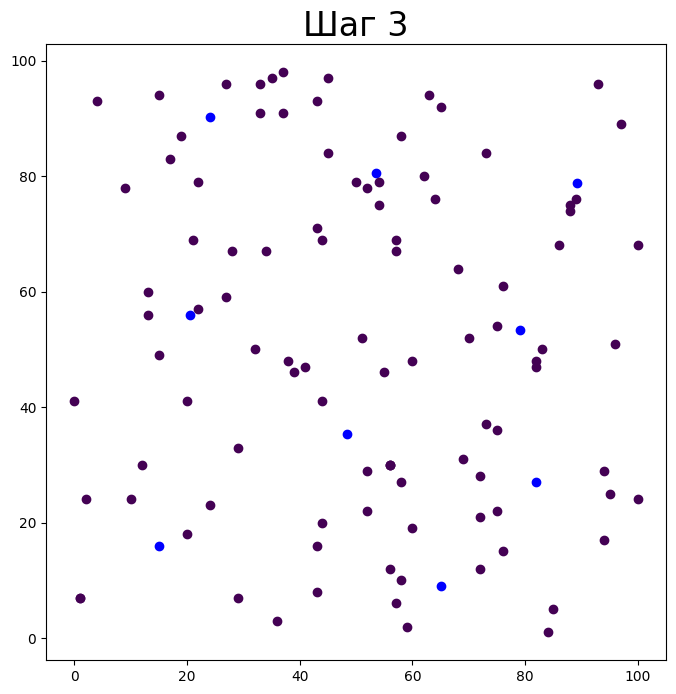

<Figure size 640x480 with 0 Axes>

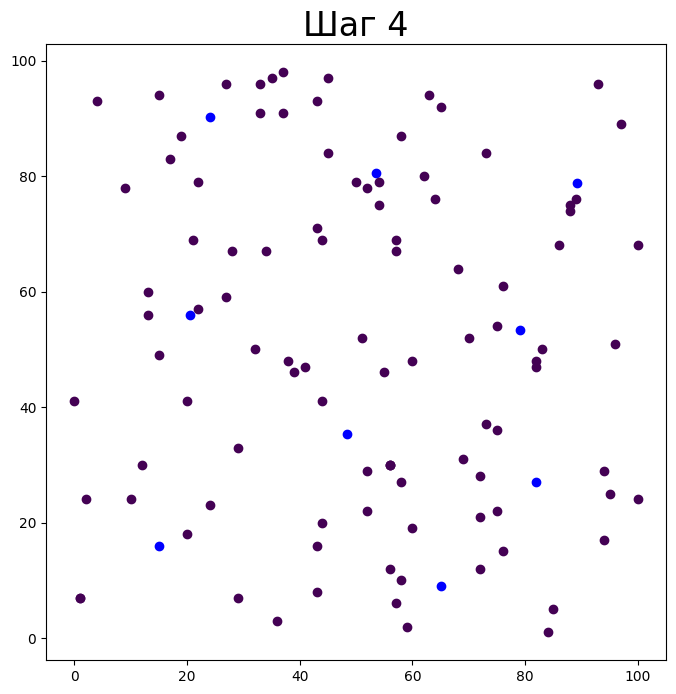

In [6]:
points_count = 100
clusters_count = 3

if __name__ == "__main__":
    points = random_points(points_count)
    clusters_count = optimal_clusters(points)
    print(f"Optimal clusters {clusters_count}")
    plt_colors = colors.generate_contrast_colors(clusters_count)
    centroids = first_centroids(points, clusters_count)
    points, centroids = k_means(points, centroids, need_draw=True)